# DDIM inversion & Skipped DDIM inversion

With Skipped DDIM inversion, you can "skip" initial inversions to more efficiently invert a latent. This can effectively save 50% of the time required to invert a latent with decent quality.

In [ ]:
from inversion_edits import ddim_inversion_latent, ddim_first_skipped_latent

from diffusers import DDIMScheduler, StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, local_files_only = True).to(
    "cuda:0"
)


In [27]:
import PIL
x = PIL.Image.open("horse.jpg")
lat = ddim_first_skipped_latent(pipe, x, condition_prompt="", num_inference_steps= 10, skip_ratio=0.6)

Scheduler for Pipe is now DDIMScheduler


11it [00:00, 26.97it/s]


100%|██████████| 50/50 [00:02<00:00, 17.00it/s]


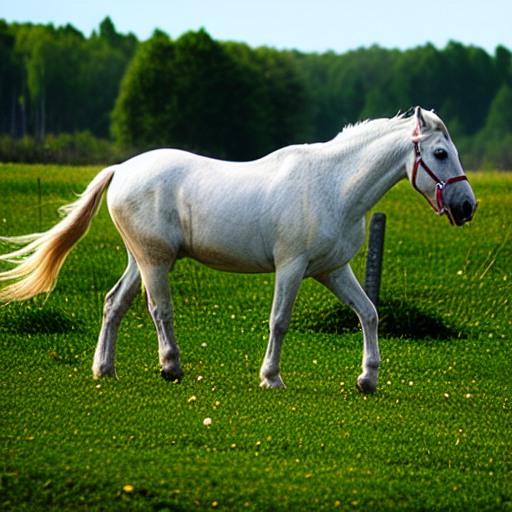

In [28]:
pipe.safety_checker = None
x_reco = pipe(prompt = "", latents = lat)
x_reco.images[0]

Scheduler for Pipe is now DDIMScheduler


100%|██████████| 50/50 [00:02<00:00, 17.00it/s]


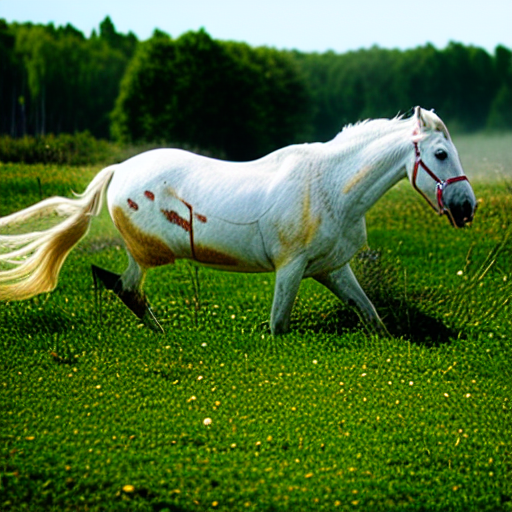

In [29]:
lat = ddim_inversion_latent(pipe, x, condition_prompt="", num_inference_steps= 10)
x_unskipped_reco = pipe(prompt = "", latents = lat)
x_unskipped_reco.images[0]

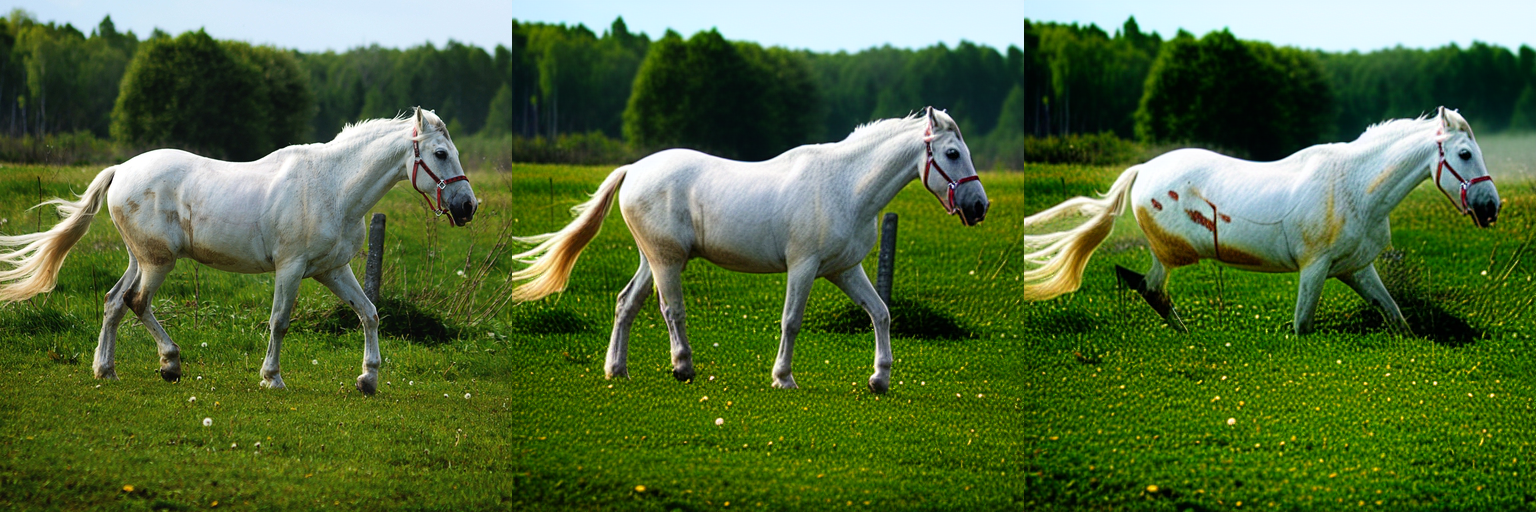

In [30]:
from lora_diffusion import image_grid
image_grid([x, x_reco.images[0], x_unskipped_reco.images[0]], 1, 3)

# Edits

In [38]:
lat = ddim_first_skipped_latent(pipe, x, condition_prompt="", num_inference_steps= 30, skip_ratio=0.6)
pipe.safety_checker = None
x2 = pipe(prompt = "horse with blue boots", latents = lat, num_inference_steps=100, guidance_scale= 7.)

Scheduler for Pipe is now DDIMScheduler


31it [00:01, 28.49it/s]
100%|██████████| 100/100 [00:05<00:00, 17.17it/s]


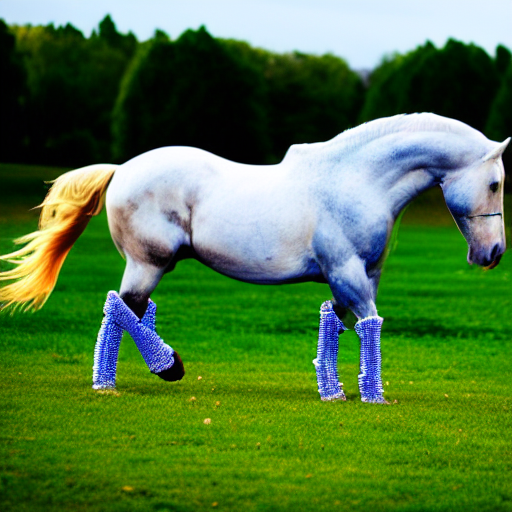

In [39]:
x2.images[0]

# Perfect reconstruction

Scheduler for Pipe is now DDIMScheduler


100%|██████████| 50/50 [00:02<00:00, 17.01it/s]


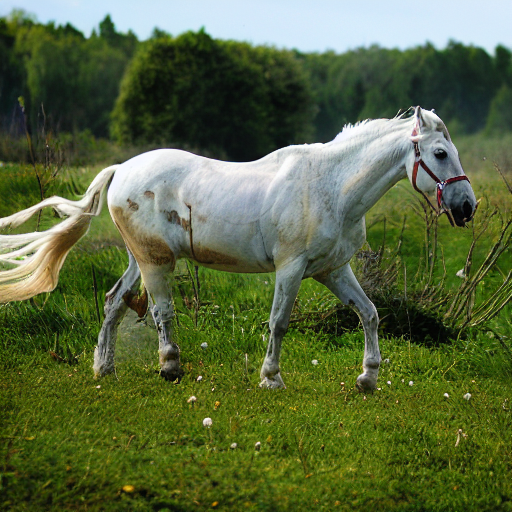

In [40]:
lat = ddim_inversion_latent(pipe, x, condition_prompt="", num_inference_steps= 250)
x_unskipped_reco = pipe(prompt = "", latents = lat)
x_unskipped_reco.images[0]